<a href="https://colab.research.google.com/github/coderzaman/Automated-Multi-Stage-Liver-Disease-Diagnosis-using-AutoML-and-Explainable-AI-XAI/blob/main/Automated_Multi_Stage_Liver_Disease_Diagnosis_using_AutoML_and_Explainable_AI_(XAI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing package**

In [ ]:
!pip install watermark
!pip install pydotplus
# !pip install --upgrade scikit-learn
!pip install pycaret
# Install a specific version of scikit-learn that is compatible with pycaret
!pip install scikit-learn==1.0.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 58.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# **Import Libraries**

In [ ]:
# System libraries
import re
import string
import unicodedata
import itertools
from collections import Counter

# Library for file manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Colab Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Colab Notebook: 3.11.12
Author: Library versions

google    : 2.0.3
pandas    : 2.1.4
plotly    : 5.24.1
re        : 2.2.1
numpy     : 1.26.4
imblearn  : 0.13.0
matplotlib: 3.7.5
seaborn   : 0.13.2
watermark : 2.5.0
pycaret   : 3.3.2
platform  : 1.0.8
sklearn   : 1.4.2



# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/HepatitisCdata.csv")
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


# **Information About Dataset**

In [ ]:
data = df
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [ ]:
df.shape

(615, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
Category,object
Age,int64
Sex,object
ALB,float64
ALP,float64
ALT,float64
AST,float64
BIL,float64
CHE,float64


In [ ]:
df.Category.value_counts()

,count
Category,
0=Blood Donor,533
3=Cirrhosis,30
1=Hepatitis,24
2=Fibrosis,21
0s=suspect Blood Donor,7


# **Data Preprocessing**

In [ ]:
# Check for any missing values
df.isnull().sum()

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
# Check for any missing values
df.isnull().sum()

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,0
ALP,0
ALT,0
AST,0
BIL,0
CHE,0


In [ ]:
# Checking for missing data
missing_data = data.isnull()

print("Missing data by column:")
missing_data

Missing data by column:


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,False,False,False,False,False,False,False,False,False,False,False,False,False,False
609,False,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Print the total number of missing values in the entire DataFrame.
total_missing = data.isnull().sum().sum()
print("Total data missing in DataFrame:", total_missing)

Total data missing in DataFrame: 0


In [ ]:
# Delete Irrelevant Column
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
data.shape

(589, 13)

**Cleaning Column Names**

This is done because some models or libraries like LightGBM might not handle column names with special characters (such as spaces, hyphens, or slashes).

In [ ]:
def clean_column_names(data):
    data.columns = [re.sub(r"[^a-zA-Z0-9_]", "_", col) for col in data.columns]
    return data


# **Data Visualization**

**Age Distribution by Patient Category**

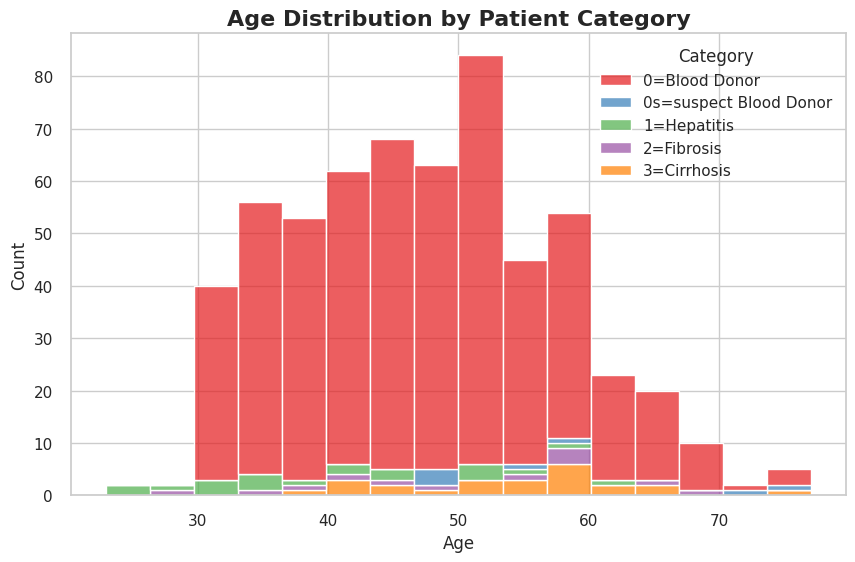

In [ ]:
plt.figure(figsize=(10, 6))

# Create the histogram
bars = sns.histplot(data=data, x='Age', hue='Category', multiple='stack', palette='Set1', alpha=0.7)

# Add a title
plt.title('Age Distribution by Patient Category', fontsize=16, fontweight='bold')  # Customize the title
plt.show()


**Age Distribution of Patients**

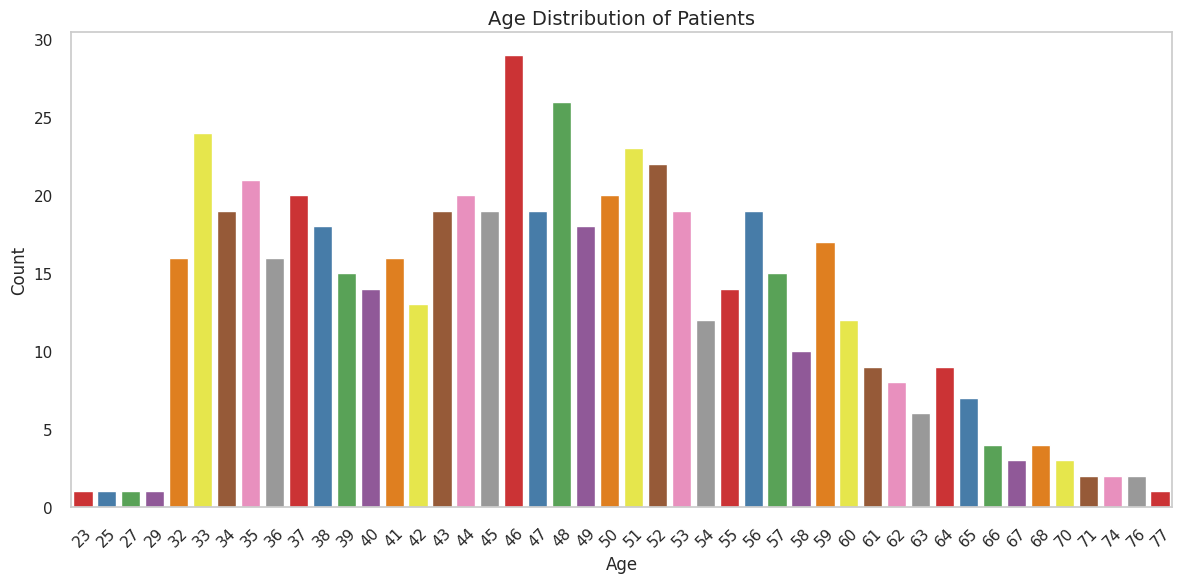

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Create a count plot for the 'Age' column
sns.countplot(x="Age", data=df, palette="Set1")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('Age Distribution of Patients', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()  # Ensure all elements fit within the figure bounds
plt.grid(False)  # Disable grid lines for a cleaner look
plt.show()  # Display the plot


**Average Age by Gender and Category**

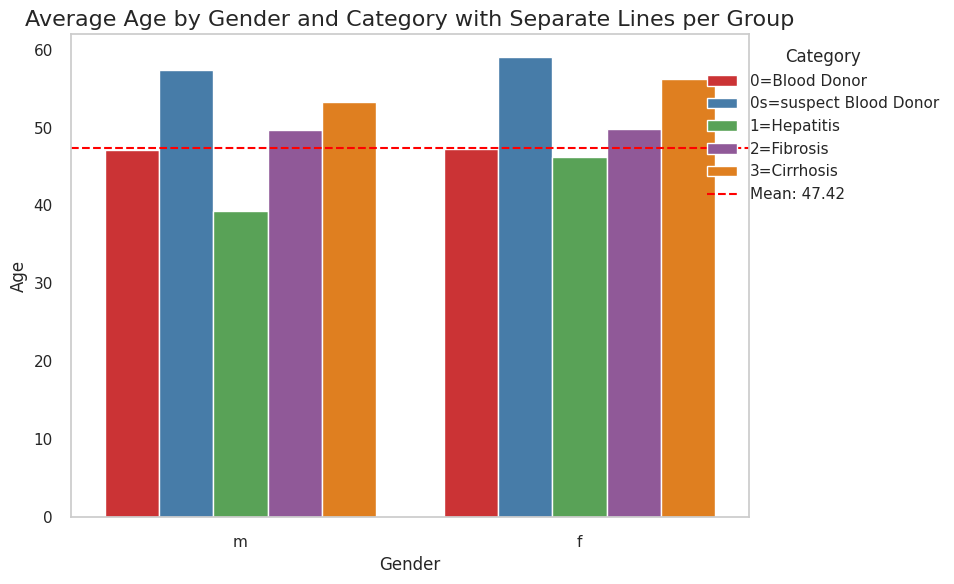

In [ ]:
plt.figure(figsize=(10, 6))
# Create the barplot
bars = sns.barplot(x="Sex", y="Age", data=df, hue="Category", ci=None, palette="Set1")

mean_height = df['Age'].mean()
plt.axhline(mean_height, color='red', linestyle='--', label=f'Mean: {mean_height:.2f}')

# Add title and labels
plt.title('Average Age by Gender and Category with Separate Lines per Group', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Adjust the legend position
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.3, 1))

# Display the plot
plt.tight_layout()
plt.grid(False)
plt.show()



**Gender Distribution by Patient Category**

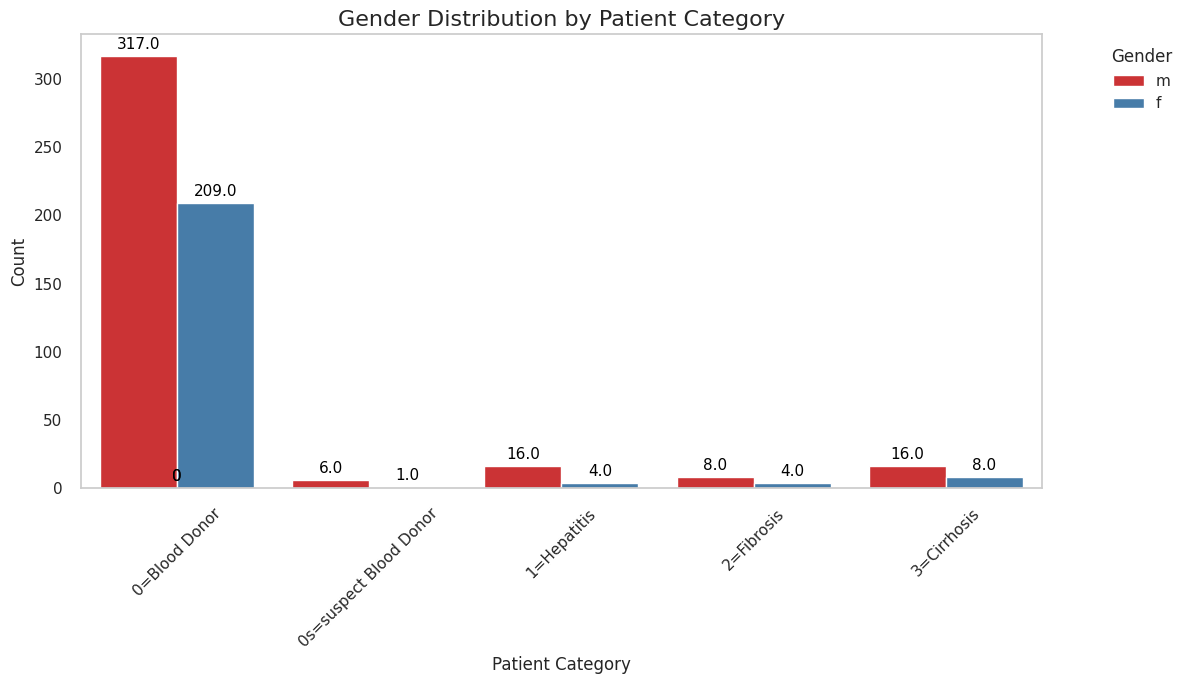

In [ ]:
plt.figure(figsize=(12, 7))  # Adjusted figure size
sns.countplot(data=data, x='Category', hue='Sex', palette='Set1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('Gender Distribution by Patient Category', fontsize=16)
plt.xlabel('Patient Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add annotations to each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Move the legend
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.tight_layout()  # Ensure everything fits
plt.grid(False)
plt.show()

**Correlation Heatmap of Laboratory Values**

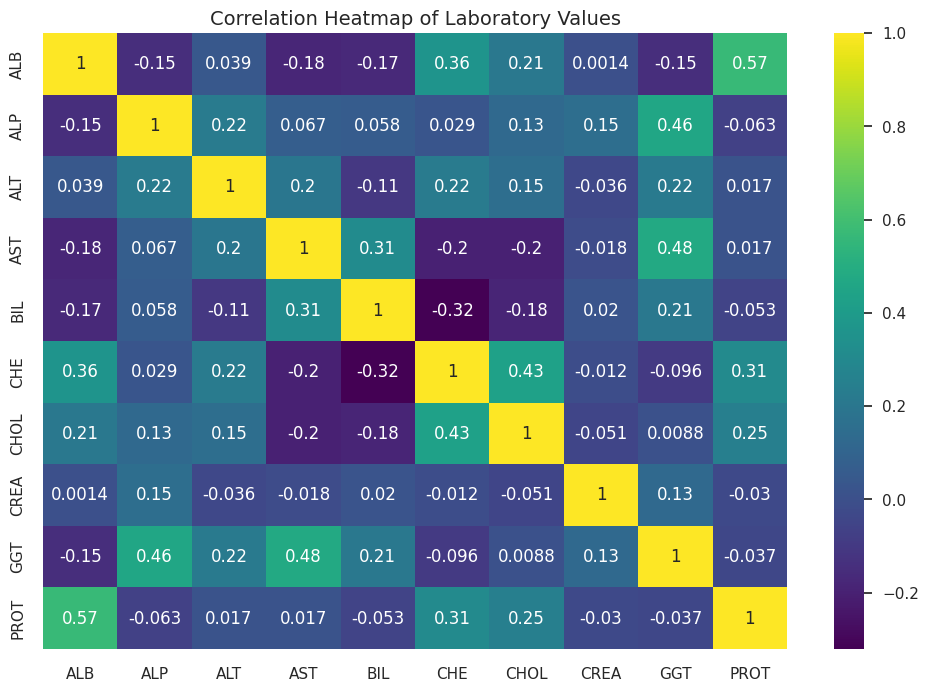

In [ ]:
plt.figure(figsize=(12, 8))

# Use a different colormap for the heatmap
sns.heatmap(df[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].corr(),
            annot=True,
            cmap='viridis')

plt.title('Correlation Heatmap of Laboratory Values', fontsize=14)
plt.show()


**Patient Category By Laboratory Value**

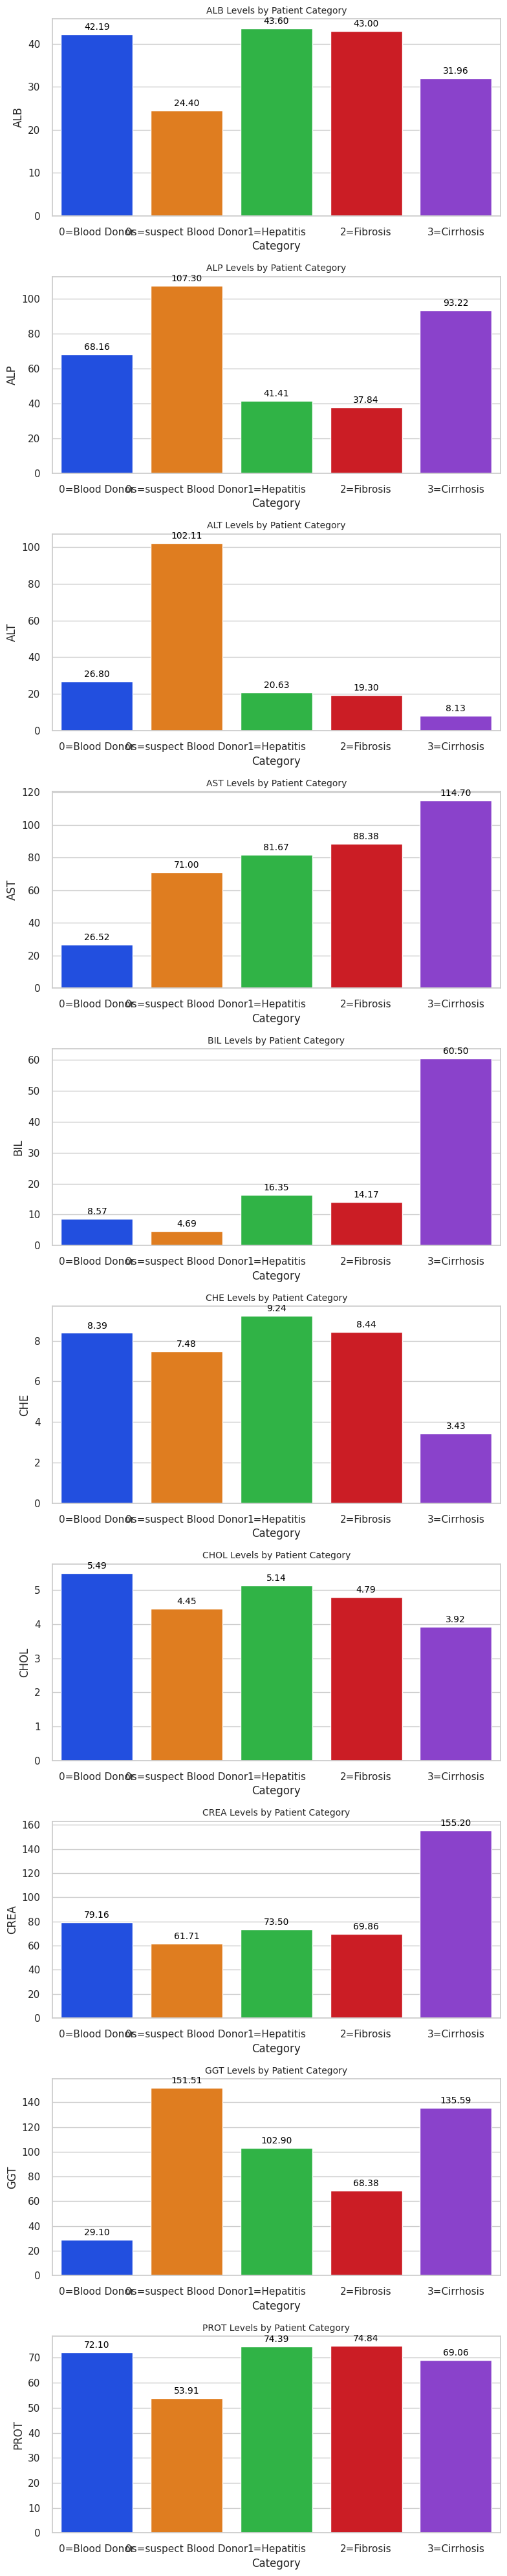

In [ ]:
# Define the variables we want to analyze
variables = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Set up the figure
plt.figure(figsize=(8, len(variables) * 4))

for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    bars = sns.barplot(data=df, x='Category', y=var, ci=None, palette='bright')

    # Annotate each bar with its height
    for p in bars.patches:
        bars.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

    # Add titles and labels
    plt.title(f'{var} Levels by Patient Category', fontsize=10)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel(var, fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**Proportion of patients in each category**

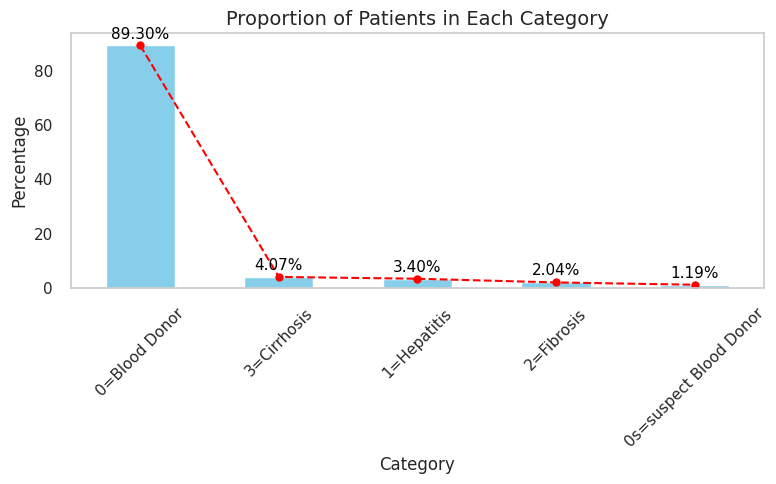

,proportion
Category,
0=Blood Donor,89.303905
3=Cirrhosis,4.074703
1=Hepatitis,3.395586
2=Fibrosis,2.037351
0s=suspect Blood Donor,1.188455


In [ ]:
# Proportion of patients in each category
category_counts = df['Category'].value_counts(normalize=True) * 100

# Plot the proportion of each category with enhancements
plt.figure(figsize=(8, 5))
bars = category_counts.plot(kind='bar', color='skyblue')

# Add percentage annotations on top of the bars
for p in bars.patches:
    bars.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                  textcoords='offset points')

# Calculate the center of each bar for the line plot
bar_centers = [p.get_x() + p.get_width() / 2 for p in bars.patches]
bar_heights = [p.get_height() for p in bars.patches]

# Plot the red dashed line following the height of the bars
plt.plot(bar_centers, bar_heights, color='red', linestyle='--', marker='o')

# Add title and labels
plt.title('Proportion of Patients in Each Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

category_counts

# **Feature engineering**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating the Label encoder
Label_pre = LabelEncoder()
data_cols=data.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)

# Applying encoder
data[label_col]= data[label_col].apply(lambda col:Label_pre.fit_transform(col))

# Saved dataset with Label Encoder
data.to_csv("dataset_LabelEncoder.csv", index=False)


In [ ]:
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,4,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,4,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,4,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,4,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


# **Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the columns to normalize (exclude 'Category' and 'Sex')
cols_to_normalize = [
    'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL',
    'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'
]

# Initialize the scaler
scaler = StandardScaler()

# Apply normalization only on selected columns
data_scaled = data.copy()
data_scaled[cols_to_normalize] = scaler.fit_transform(data_scaled[cols_to_normalize])

# Save the result
data_scaled.to_csv("dataset_Zscore_Selected_Normalized.csv", index=False)


In [ ]:
data = data_scaled
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,-1.553745,1,-0.542701,-0.603230,-0.905494,-0.355457,-0.202289,-0.581777,-1.916091,0.480336,-0.481022,-0.540788
1,0,-1.553745,1,-0.542701,0.084054,-0.411380,-0.276283,-0.409283,1.354993,-0.524241,-0.151402,-0.416513,0.862566
2,0,-1.553745,1,0.916417,0.253944,0.461714,0.573318,-0.282787,0.290683,-0.169629,0.085500,-0.092127,1.386485
3,0,-1.553745,1,0.273710,-0.622536,0.193070,-0.340231,0.453193,-0.399063,-0.577433,-0.032951,-0.081068,0.712875
4,0,-1.553745,1,-0.421108,0.230777,0.289014,-0.273238,-0.081542,0.432286,-0.949775,-0.111918,-0.152949,-0.596922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,4,1.066457,0,-1.324372,-0.838760,-0.555297,3.539307,-0.173540,-0.887823,-1.251194,-0.506754,0.211985,1.629733
609,4,1.167234,0,-0.455849,-0.649564,-0.334624,7.674639,1.666409,-1.111648,-0.781334,1.074564,1.159341,-0.260117
610,4,1.469565,0,-1.671781,13.455196,-0.991844,2.330377,2.241393,-1.203005,0.805552,-0.512677,11.292728,-0.634344
611,4,1.671119,0,-3.061418,1.338926,-1.135760,0.323615,0.516441,-3.043850,-2.102261,-0.368562,-0.042363,-0.110426


# **Train And Evaluation**

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop("Category", axis=1) # Drop the target column to get the features
Y = data["Category"] # Set the target column


In [ ]:
# Visualize rows and column x
X.shape


(589, 12)

In [ ]:
Y.shape

(589,)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Visualize training data
print(f"Rows and columns of training data X_train:{X_train.shape}")
print(f"Rows and columns of training data y_train:{y_train.shape}")
print(f"Rows and columns of training data X_test:{X_test.shape}")
print(f"Rows and columns of training data y_test:{y_test.shape}")

Rows and columns of training data X_train:(471, 12)
Rows and columns of training data y_train:(471,)
Rows and columns of training data X_test:(118, 12)
Rows and columns of training data y_test:(118,)


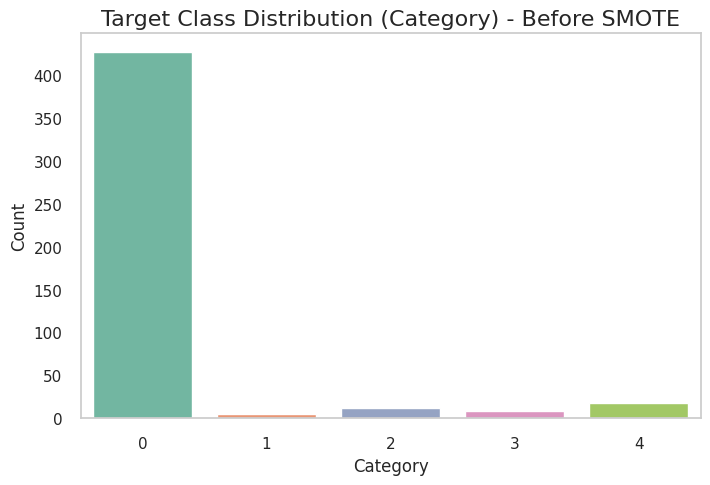

Class distribution before SMOTE:
Category
0    427
4     18
2     12
3      9
1      5
Name: count, dtype: int64


In [ ]:
import pandas as pd # Import pandas library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='Set2')
plt.title('Target Class Distribution (Category) - Before SMOTE', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(False)
plt.show()

print(f"Class distribution before SMOTE:\n{pd.Series(y_train).value_counts()}")

In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE with fewer neighbors to the training set to balance the classes
smote = SMOTE(k_neighbors=2, random_state=42)  # Reduce k_neighbors to 2 or any number < 5
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

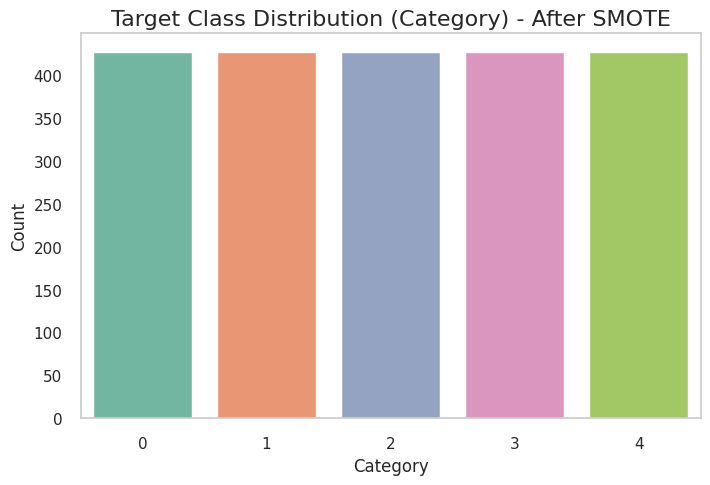


Class distribution after SMOTE:
Category
0    427
3    427
4    427
1    427
2    427
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_res, palette='Set2')
plt.title('Target Class Distribution (Category) - After SMOTE', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(False)
plt.show()

print()
print(f"Class distribution after SMOTE:\n{pd.Series(y_train_res).value_counts()}")

# **Machine Learnig Model**

In [ ]:
%%time
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Add ExtraTreesClassifier to the models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC": SVC(),
    "LightGBM": LGBMClassifier(verbose=-1),  # Suppress all logs and warnings
    "Extra Trees": ExtraTreesClassifier()  # 10th algorithm added
}

# Define parameter grids for each model, including ExtraTreesClassifier
param_grids = {
    'Logistic Regression': { 'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    'Naive Bayes': {},  # Naive Bayes has fewer hyperparameters to tune
    'Decision Tree Classifier': {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'KNN': {'n_neighbors': range(1, 21), 'metric': ['manhattan']},  # Test different K values with Manhattan distance
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'LightGBM': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'num_leaves': [31, 50, 100]},
    'Extra Trees': {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}  # Hyperparameters for Extra Trees
}

# Step 3: Iterate through each model and apply GridSearchCV for hyperparameter tuning
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    # Fetch the parameter grid for the current model
    param_grid = param_grids.get(model_name, {})

    # If param_grid is empty (e.g., Naive Bayes), skip tuning
    if param_grid:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

        # Fit GridSearchCV with resampled training data
        grid_search.fit(X_train_res, y_train_res)

        # Best parameters and accuracy for the model
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        best_model = grid_search.best_estimator_

        # Evaluate the tuned model on the test set
        y_pred_best = best_model.predict(X_test)
        best_accuracy = accuracy_score(y_test, y_pred_best)
        print(f'{model_name} Best Accuracy: {best_accuracy:.2f}')
    else:
        # If no hyperparameters to tune, just fit and evaluate the model
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{model_name} Accuracy without tuning: {accuracy:.2f}')

    print("-" * 60)


Tuning hyperparameters for Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Logistic Regression Best Accuracy: 0.91
------------------------------------------------------------
Tuning hyperparameters for Naive Bayes...
Naive Bayes Accuracy without tuning: 0.88
------------------------------------------------------------
Tuning hyperparameters for Decision Tree Classifier...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Decision Tree Classifier: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classifier Best Accuracy: 0.90
------------------------------------------------------------
Tuning hyperparameters for Random Forest...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest 

**Ensemble Model**

In [ ]:

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

# Define the parameter grid for SVC
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create and fit GridSearchCV for SVC
grid_search_svc = GridSearchCV(estimator=SVC(), param_grid=param_grid_svc, cv=3, n_jobs=-1, verbose=2) # Define grid_search_svc
grid_search_svc.fit(X_train_res, y_train_res) # Fit grid_search_svc

best_svc = grid_search_svc.best_estimator_
# Step 1: Define your N-semble by selecting the top 4–5 models (replace these with your best models)
# Give unique names to each model in the list. Changed 'Gradient Boosting' to 'Gradient Boosting 2'
n_semble_models = [
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2)),
    ('SVC', SVC(probability=True)),  # Enable probability for soft voting
]

# Step 2: Create the N-semble model using VotingClassifier
n_semble = VotingClassifier(estimators=n_semble_models, voting='soft')  # Use 'hard' for majority voting

# Step 3: Train the N-semble model
print("Training the N-semble model...")
n_semble.fit(X_train_res, y_train_res)

# Step 4: Evaluate the N-semble model on the test set
y_pred_n_semble = n_semble.predict(X_test)
n_semble_accuracy = accuracy_score(y_test, y_pred_n_semble)
print(f'N-semble Model Accuracy: {n_semble_accuracy:.2f}')

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Training the N-semble model...
N-semble Model Accuracy: 0.95


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_n_semble))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       1.00      0.50      0.67         2
           2       1.00      0.50      0.67         8
           3       0.43      1.00      0.60         3
           4       1.00      0.83      0.91         6

    accuracy                           0.95       118
   macro avg       0.88      0.77      0.77       118
weighted avg       0.97      0.95      0.95       118



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Import XGBoost

# Step 1: GridSearch for SVC (you already did this)
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svc = GridSearchCV(estimator=SVC(probability=True), param_grid=param_grid_svc, cv=3, n_jobs=-1, verbose=2)
grid_search_svc.fit(X_train_res, y_train_res)
best_svc = grid_search_svc.best_estimator_

# Step 2: Define the ensemble with best models
n_semble_models = [
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)),
    ('SVC', best_svc),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))  # Added XGBoost
]

# Step 3: Create the Voting Classifier
n_semble = VotingClassifier(estimators=n_semble_models, voting='soft')

# Step 4: Train the ensemble
print("Training the N-semble model...")
n_semble.fit(X_train_res, y_train_res)

# Step 5: Predict and evaluate
y_pred_n_semble = n_semble.predict(X_test)
n_semble_accuracy = accuracy_score(y_test, y_pred_n_semble)
print(f'N-semble Model Accuracy (RF + SVC + XGBoost): {n_semble_accuracy:.4f}')


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Training the N-semble model...
N-semble Model Accuracy (RF + SVC + XGBoost): 0.9492


**Model Evaluation Result for Each**

In [ ]:
from sklearn.metrics import classification_report

# Model dictionary with 8 models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC": SVC(),
    "LightGBM": LGBMClassifier(verbose=-1),
    "Extra Trees": ExtraTreesClassifier()# Suppress all logs and warnings
}

# Step 2: Iterate over models and compute classification reports
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model on the balanced data
    model.fit(X_train_res, y_train_res)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Step 3: Compute and display the classification report
    print(f"Classification Report for {model_name}:")
    report = classification_report(y_test, y_pred)
    print(report)

    print("-" * 60)

Training Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        99
           1       0.50      0.50      0.50         2
           2       0.75      0.38      0.50         8
           3       0.29      0.67      0.40         3
           4       0.80      0.67      0.73         6

    accuracy                           0.92       118
   macro avg       0.66      0.64      0.62       118
weighted avg       0.93      0.92      0.92       118

------------------------------------------------------------
Training Naive Bayes...
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        99
           1       0.50      0.50      0.50         2
           2       0.36      0.50      0.42         8
           3       0.14      0.33      0.20         3
           4       1.00      1.00    

**Confusion Matrix**

Training Logistic Regression...


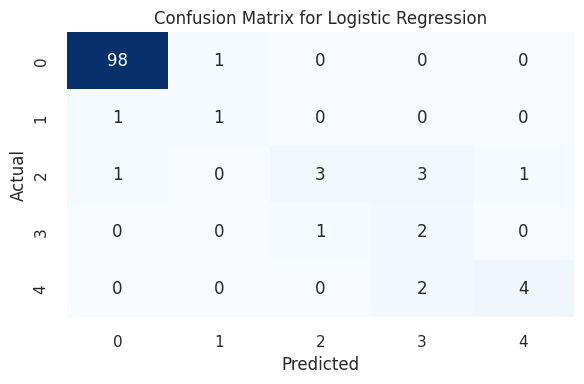

------------------------------------------------------------
Training Naive Bayes...


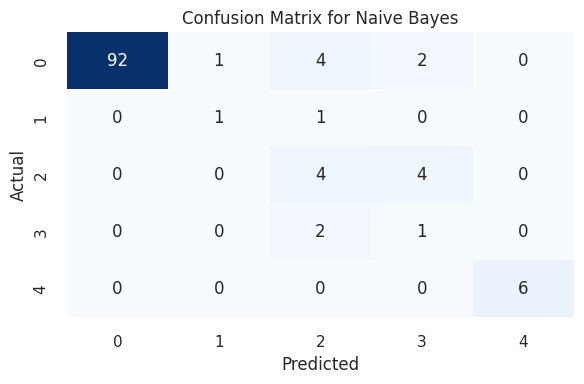

------------------------------------------------------------
Training Decision Tree Classifier...


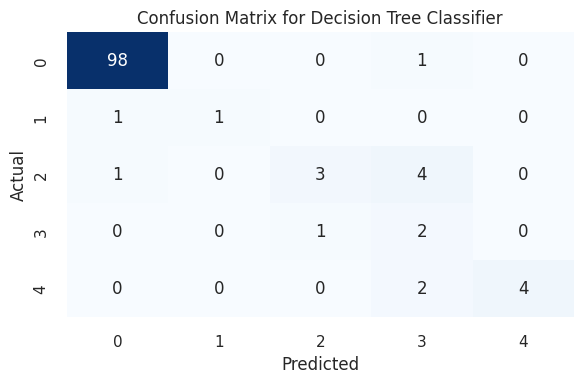

------------------------------------------------------------
Training Random Forest...


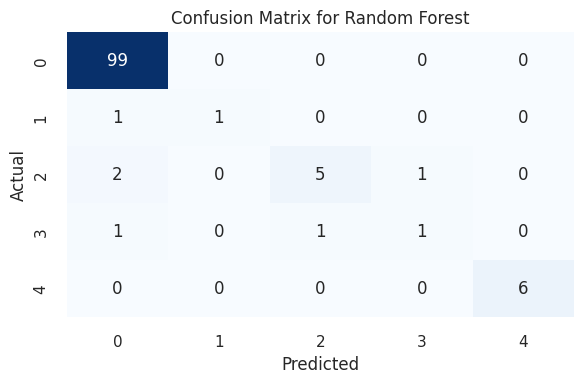

------------------------------------------------------------
Training AdaBoost...


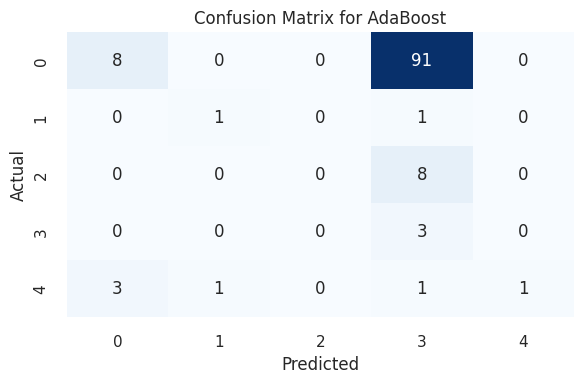

------------------------------------------------------------
Training Gradient Boosting...


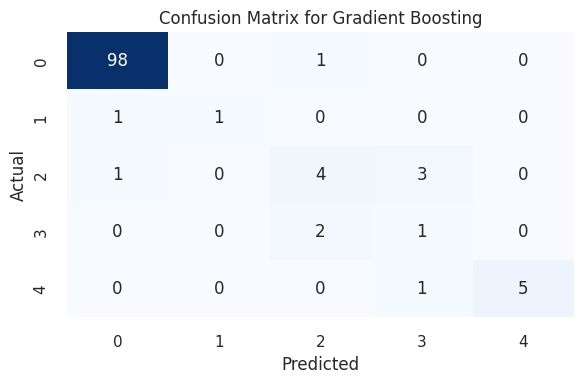

------------------------------------------------------------
Training XGBoost...


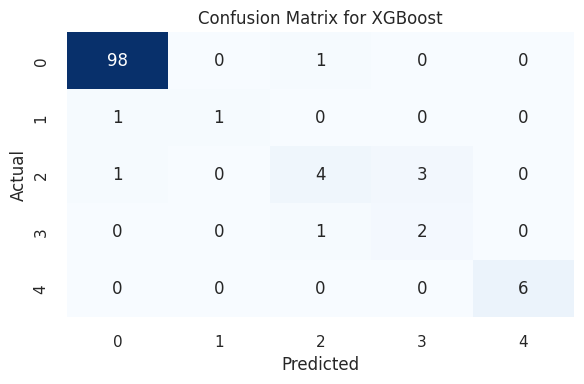

------------------------------------------------------------
Training SVC...


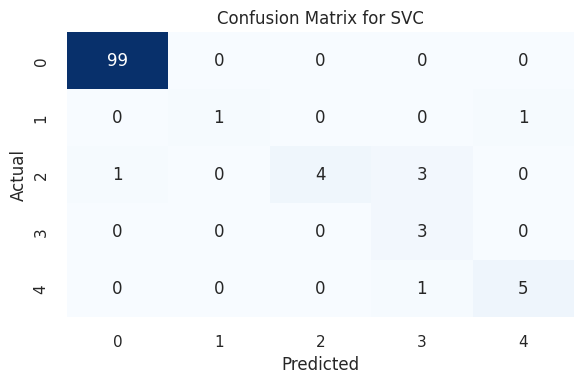

------------------------------------------------------------
Training LightGBM...


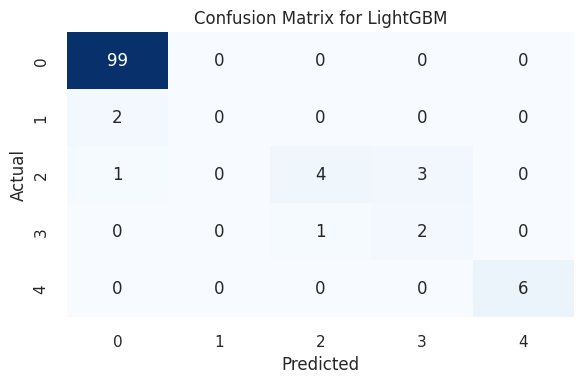

------------------------------------------------------------
Training Extra Trees...


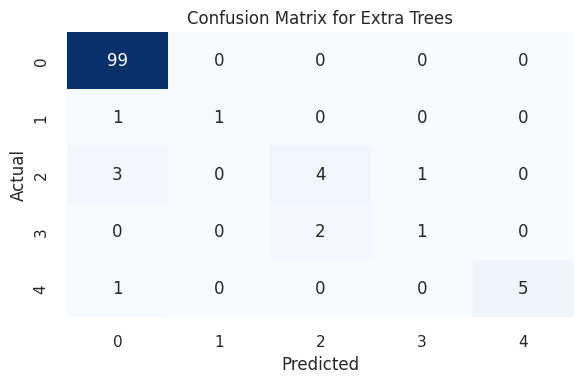

------------------------------------------------------------


In [ ]:
from sklearn.metrics import confusion_matrix

# Step 4: Iterate over models and plot confusion matrix for each
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model with the balanced dataset
    model.fit(X_train_res, y_train_res)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Step 5: Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Step 6: Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    print("-" * 60)

**Identify Best one**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Model dictionary with 8 models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC": SVC(),
    "LightGBM": LGBMClassifier(verbose=-1),
    "Extra Trees": ExtraTreesClassifier()  # Suppress all logs and warnings
}

# Example dataset split (You should replace this with your actual data)
# X_train_res, X_test, y_train_res, y_test = train_test_split(X, y, test_size=0.2)

# Initialize an empty list to store the metrics for each model
metrics_list = []

# Step 2: Iterate over models
for model_name, model in models.items():
    # Train the model with the balanced data
    model.fit(X_train_res, y_train_res)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Step 3: Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the metrics for this model
    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Find the best model based on F1-Score (or you can choose Accuracy)
best_model_idx = metrics_df['F1-Score'].idxmax()

# Function to highlight the best model row in green (or any color)
def highlight_best(s):
    return ['background-color: green; color:white' if s.name == best_model_idx else '' for _ in s]

# Apply the highlighting function to the DataFrame
styled_df = metrics_df.style.apply(highlight_best, axis=1)

# Display the DataFrame with the best model highlighted
styled_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.915254,0.929467,0.915254,0.915857
1,Naive Bayes,0.881356,0.926590,0.881356,0.901188
2,Decision Tree Classifier,0.915254,0.946497,0.915254,0.920685
3,Random Forest,0.932203,0.915758,0.932203,0.923898
4,AdaBoost,0.110169,0.670225,0.110169,0.146462
5,Gradient Boosting,0.923729,0.933826,0.923729,0.926374
6,XGBoost,0.940678,0.945367,0.940678,0.939935
7,SVC,0.949153,0.968608,0.949153,0.948891
8,LightGBM,0.940678,0.929561,0.940678,0.931741
9,Extra Trees,0.898305,0.882203,0.898305,0.886264


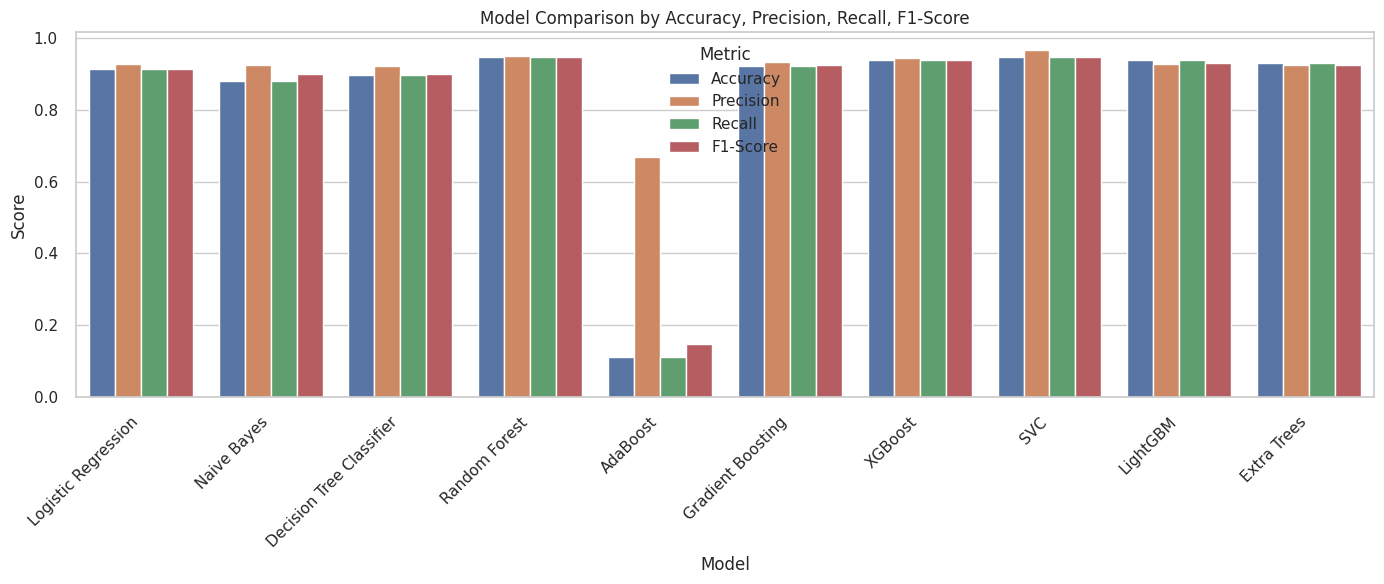

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier


# Re-define the models dictionary to ensure it is correctly initialized
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC": SVC(),
    "LightGBM": LGBMClassifier(verbose=-1),
    "Extra Trees": ExtraTreesClassifier()
}


# Assuming you already have X_train_res, X_test, y_train_res, y_test
# models = {...}  # Your dictionary of models

# Evaluate models and store metrics
metrics_list = []

for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Melt the DataFrame to long format for Seaborn
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot with Seaborn
plt.figure(figsize=(14, 6))
sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric')
plt.xticks(rotation=45, ha='right')
plt.title('Model Comparison by Accuracy, Precision, Recall, F1-Score')
plt.legend(title='Metric')
plt.tight_layout()
plt.savefig("model_comparison_metrics.png", dpi=300)
plt.show()

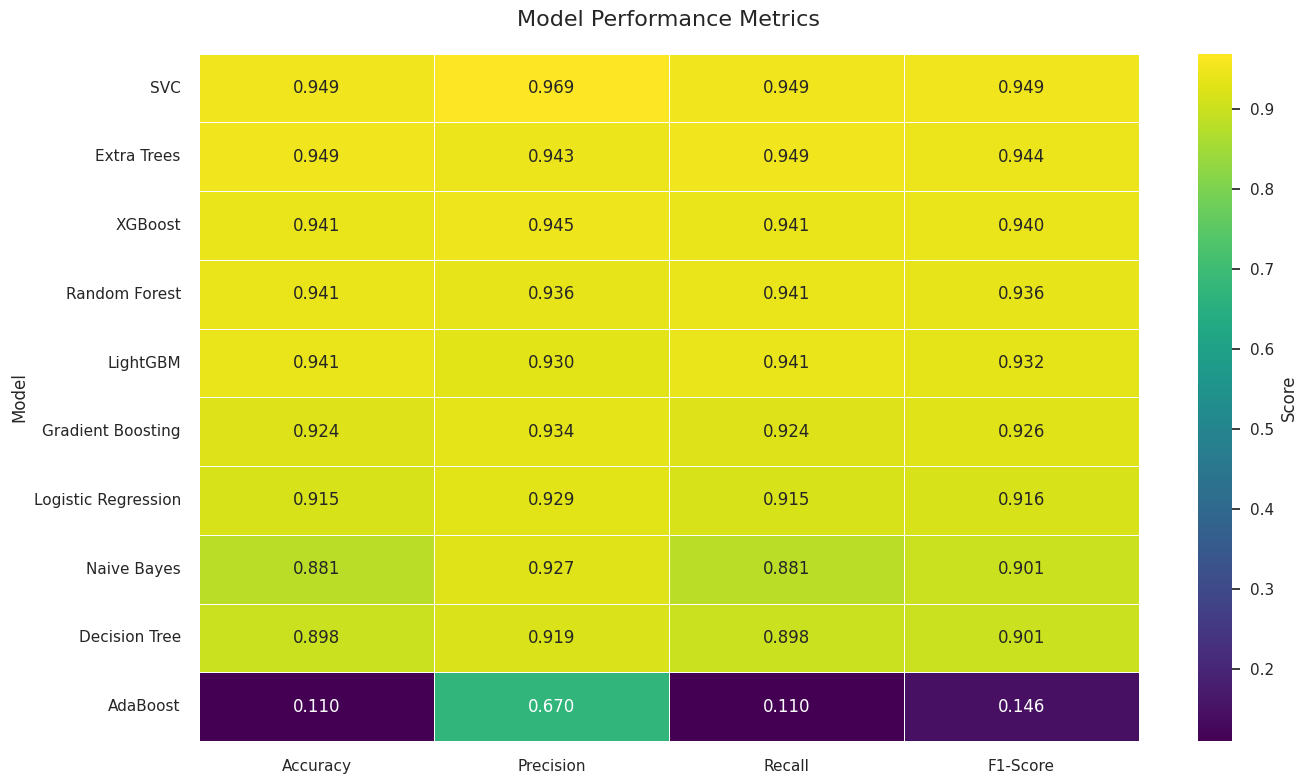

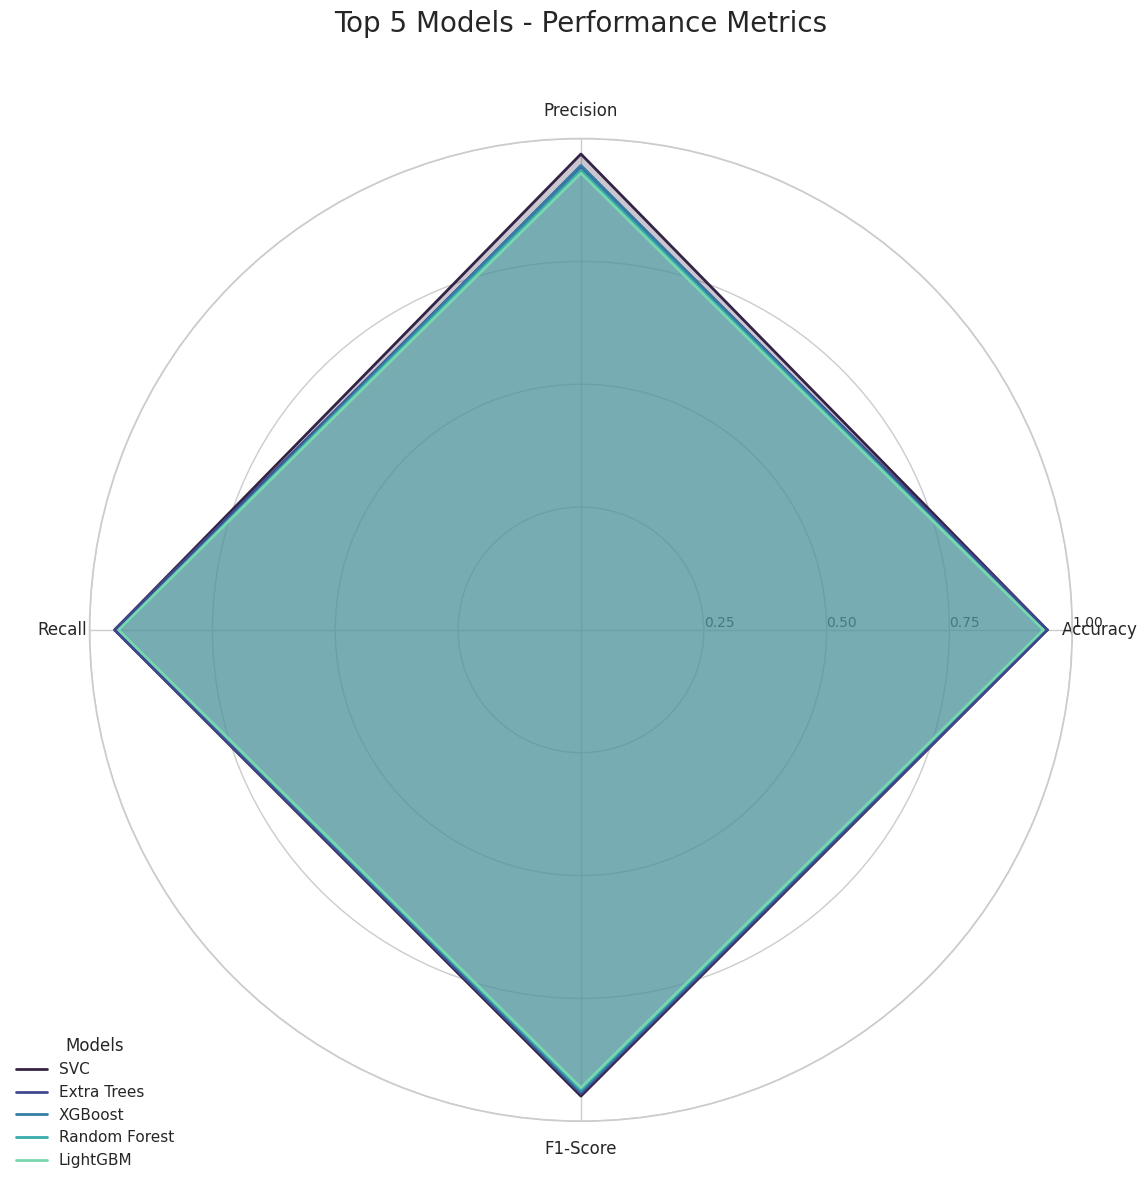

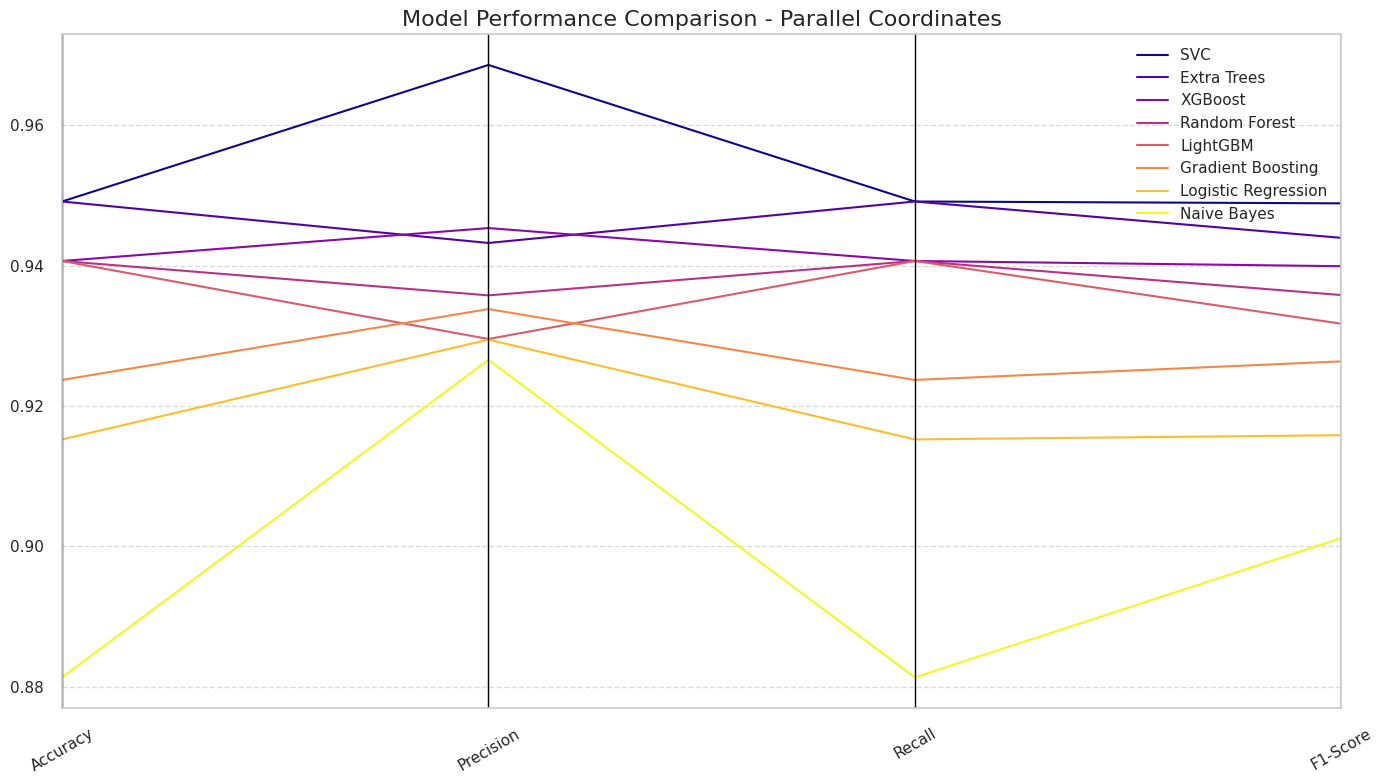

<Figure size 1400x800 with 0 Axes>

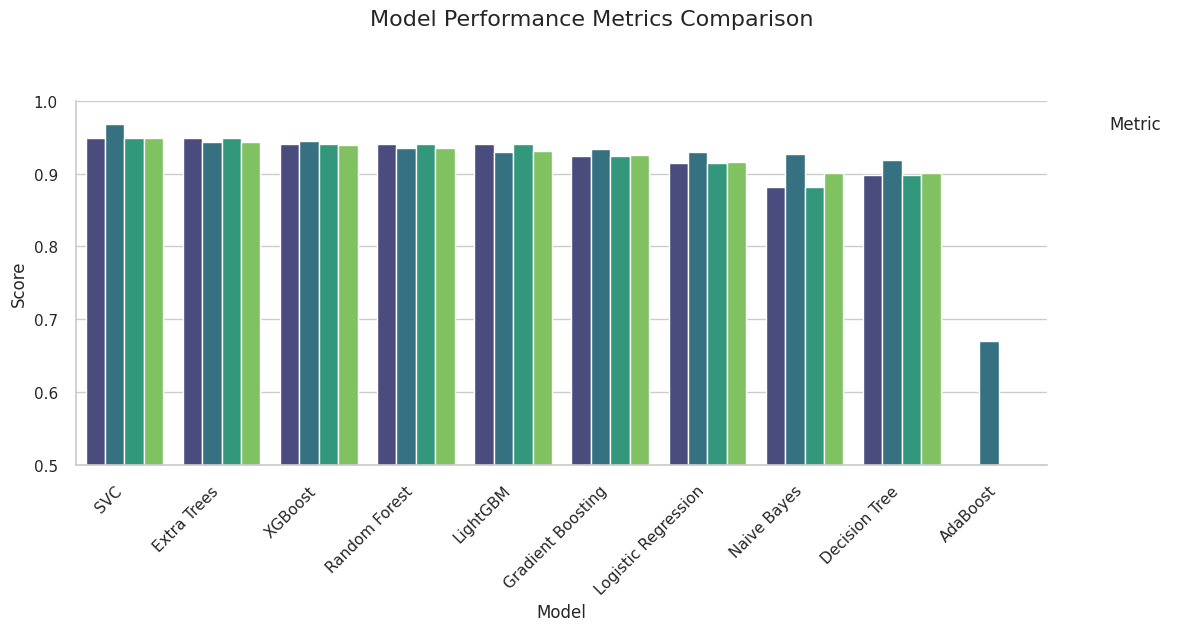

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

# Define the models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC": SVC(),
    "LightGBM": LGBMClassifier(verbose=-1),
    "Extra Trees": ExtraTreesClassifier()
}

# Assuming you already have X_train_res, X_test, y_train_res, y_test

# Evaluate models and store metrics
metrics_list = []

for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Sort models by F1-Score for better visualization
metrics_df = metrics_df.sort_values('F1-Score', ascending=False)

# Visualization 1: Heatmap
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create a heatmap with a better color palette
heatmap_data = metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']]
ax = sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='viridis',
            linewidths=.5, cbar_kws={'label': 'Score'})
plt.title('Model Performance Metrics', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig("model_comparison_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

# Visualization 2: Radar Chart
plt.figure(figsize=(12, 12))

# Set data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
models_to_plot = metrics_df['Model'].iloc[:5]  # Top 5 models

# Number of variables
N = len(metrics)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Set figure properties
ax = plt.subplot(111, polar=True)

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], metrics, size=12)

# Draw y-axis labels
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75, 1.0], ["0.25", "0.50", "0.75", "1.00"], size=10)
plt.ylim(0, 1)

# Plot each model
color_palette = sns.color_palette("mako", len(models_to_plot))

for i, model in enumerate(models_to_plot):
    values = metrics_df.loc[metrics_df['Model'] == model, metrics].values.flatten().tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=color_palette[i])
    ax.fill(angles, values, alpha=0.25, color=color_palette[i])

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), title="Models")
plt.title('Top 5 Models - Performance Metrics', size=20, y=1.1)
plt.tight_layout()
plt.savefig("model_comparison_radar.png", dpi=300, bbox_inches='tight')
plt.show()

# Visualization 3: Parallel Coordinates Plot
plt.figure(figsize=(14, 8))

# Create a parallel coordinates plot
from pandas.plotting import parallel_coordinates

# Scale the metrics to have similar ranges
parallel_df = metrics_df.copy()
parallel_df = parallel_df.iloc[:8]  # Top 8 models for better visibility

# Use a colorful palette
cmap = plt.cm.get_cmap('plasma', len(parallel_df))
colors = [cmap(i) for i in range(len(parallel_df))]

parallel_coordinates(parallel_df, 'Model', colormap=plt.cm.plasma)
plt.title('Model Performance Comparison - Parallel Coordinates', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("model_comparison_parallel.png", dpi=300, bbox_inches='tight')
plt.show()

# Visualization 4: Grouped Bar Chart with better styling
plt.figure(figsize=(14, 8))

# Define better color palette
palette = sns.color_palette("viridis", 4)  # One color per metric

# Plot the data with better styling
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
g = sns.catplot(
    data=metrics_melted,
    kind="bar",
    x="Model", y="Score", hue="Metric",
    palette=palette,
    height=6, aspect=2,
    legend=False
)

# Customize the plot
g.set_xticklabels(rotation=45, horizontalalignment='right')
g.fig.suptitle('Model Performance Metrics Comparison', fontsize=16, y=1.05)
g.set(ylim=(0.5, 1.0))  # Adjust as needed to focus on relevant range

# Add a legend with a better position
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("model_comparison_grouped_bars.png", dpi=300, bbox_inches='tight')
plt.show()

# **AUTO ML**

In [ ]:
import pandas as pd
from pycaret.classification import *


In [ ]:
df = data_scaled


In [ ]:
clf_setup = setup(data=df, target='Category', session_id=123, use_gpu=False)

,Description,Value
0,Session id,123
1,Target,Category
2,Target type,Multiclass
3,Original data shape,"(589, 13)"
4,Transformed data shape,"(589, 13)"
5,Transformed train set shape,"(412, 13)"
6,Transformed test set shape,"(177, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9538,0.3984,0.9538,0.9346,0.9424,0.7171,0.7346,0.1010
lightgbm,Light Gradient Boosting Machine,0.9466,0.3990,0.9466,0.9230,0.9333,0.6832,0.7004,1.2330
rf,Random Forest Classifier,0.9418,0.3998,0.9418,0.9167,0.9268,0.6448,0.6703,0.2740
svm,SVM - Linear Kernel,0.9417,0.0000,0.9417,0.9151,0.9256,0.6784,0.7000,0.0510
lr,Logistic Regression,0.9368,0.0000,0.9368,0.9289,0.9311,0.6676,0.6785,0.3490
gbc,Gradient Boosting Classifier,0.9368,0.0000,0.9368,0.9249,0.9295,0.6502,0.6603,0.8410
lda,Linear Discriminant Analysis,0.9344,0.0000,0.9344,0.9034,0.9169,0.5703,0.5842,0.0440
nb,Naive Bayes,0.9296,0.3873,0.9296,0.9315,0.9277,0.6583,0.6674,0.0260
ridge,Ridge Classifier,0.9296,0.0000,0.9296,0.8795,0.9024,0.5045,0.5285,0.0450
et,Extra Trees Classifier,0.9295,0.3999,0.9295,0.8902,0.9080,0.5223,0.5562,0.2180


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Prediction With Best Model**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Train the RandomForest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

# Predict on test set
y_pred = rf.predict(X_test)

# Combine predictions and actual values into a DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Show first 20 comparisons
print(comparison_df.head(20))

# Optional: Save to CSV
comparison_df.to_csv("random_forest_predictions_vs_actual.csv", index=False)


     Actual  Predicted
528       0          0
285       0          0
520       0          0
334       0          0
211       0          0
90        0          0
300       0          0
182       0          0
556       2          3
138       0          0
557       2          2
70        0          0
398       0          0
235       0          0
428       0          0
156       0          0
210       0          0
599       4          4
510       0          0
183       0          0


In [ ]:
import pandas as pd
from sklearn.svm import SVC

# Train the model
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_res, y_train_res)

# Predict on test set
y_pred = svc.predict(X_test)

# Combine predictions and actual values into a DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Show first 20 comparisons
print(comparison_df.head(20))

# Optional: Save to CSV
comparison_df.to_csv("svc_predictions_vs_actual.csv", index=False)


     Actual  Predicted
528       0          0
285       0          0
520       0          0
334       0          0
211       0          0
90        0          0
300       0          0
182       0          0
556       2          2
138       0          0
557       2          3
70        0          0
398       0          0
235       0          0
428       0          0
156       0          0
210       0          0
599       4          4
510       0          0
183       0          0


# **XAI (SHAP)**

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a more optimized model
model = RandomForestClassifier(
    n_estimators=200,        # Number of trees (increase from default 100)
    max_depth=10,            # Limit depth to avoid overfitting (try 10–30)
    min_samples_split=5,     # Minimum samples to split an internal node
    min_samples_leaf=2,      # Minimum samples required at a leaf node
    max_features='sqrt',     # Use sqrt(n_features) for tree split (best practice)
    random_state=42,         # Ensure reproducibility
    class_weight='balanced'  # Automatically adjust for class imbalance
)

# Train on resampled (balanced) dataset
model.fit(X_train_res, y_train_res)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=200, n_jobs=None,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Expalin Prediction with shap values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

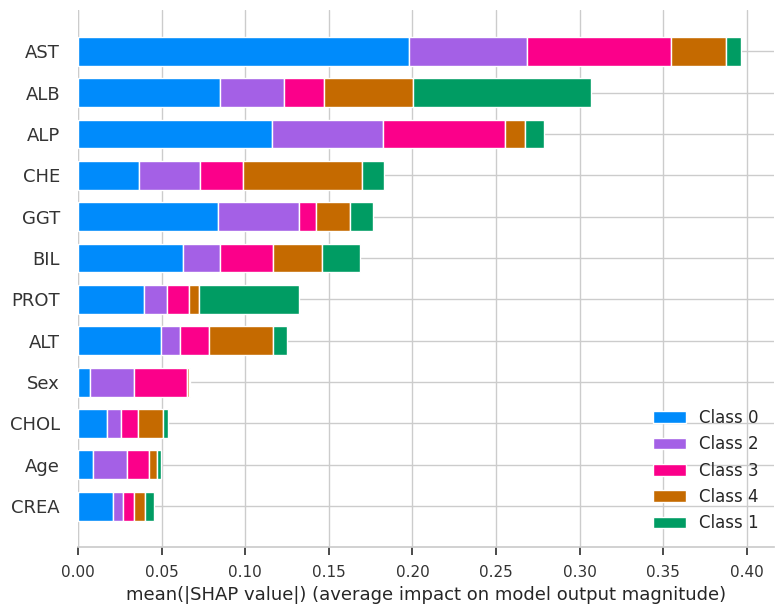

In [ ]:
shap.summary_plot(shap_values, X_test)

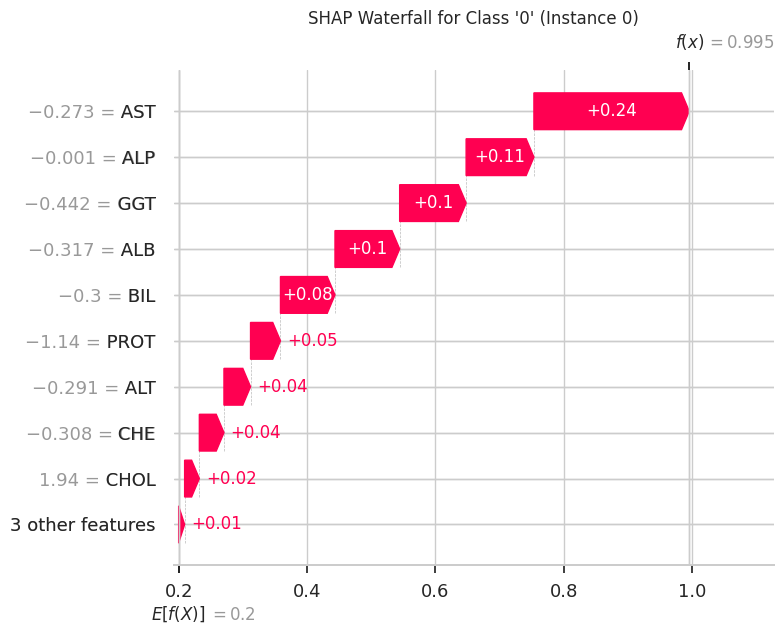

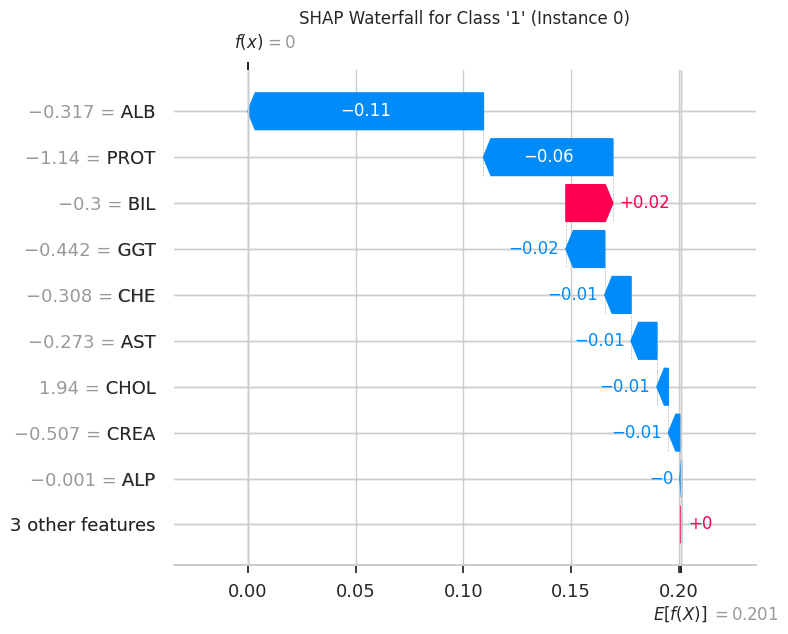

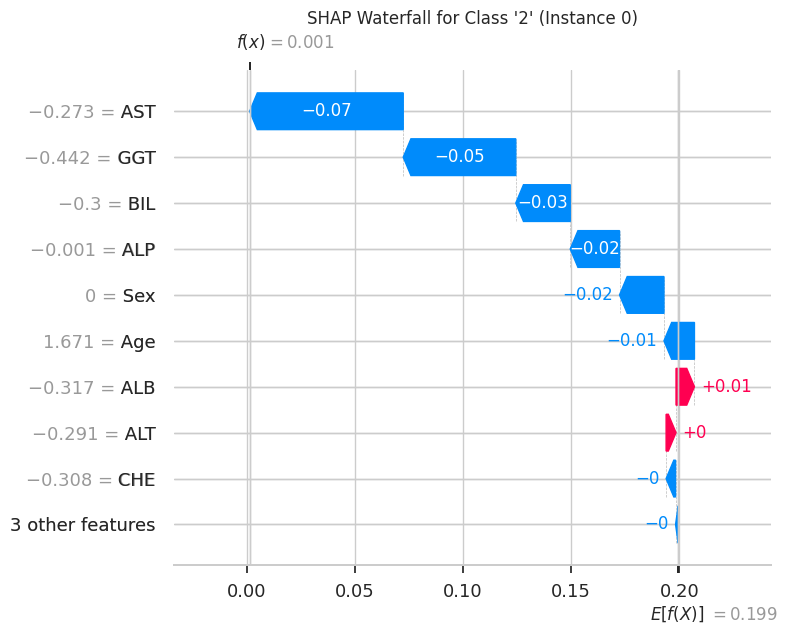

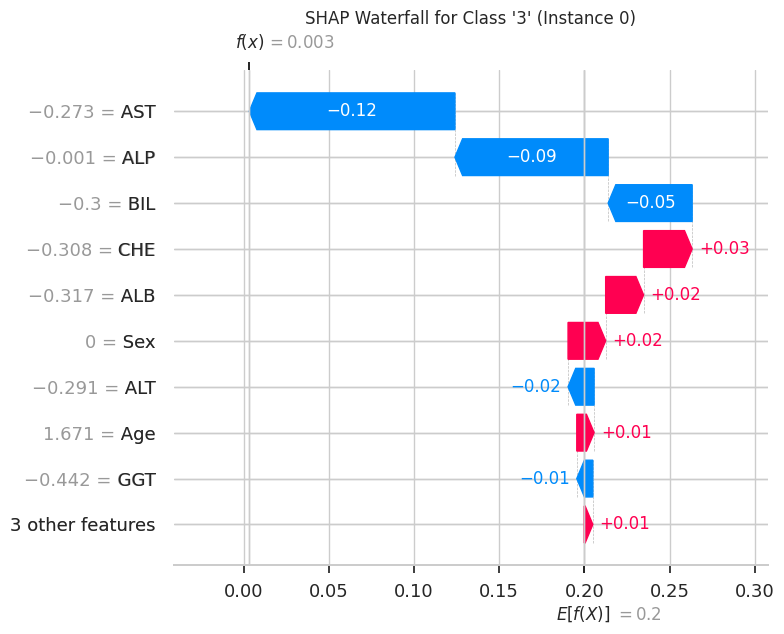

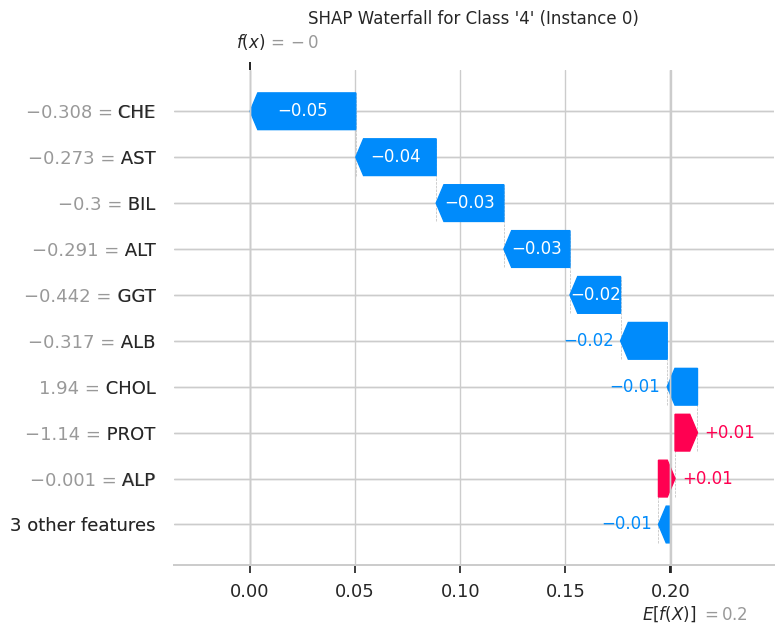

In [ ]:
import shap
import matplotlib.pyplot as plt

# Suppose you want to inspect the i-th test sample
instance_idx = 0

# Get the SHAP values array for that instance (shape: n_features × n_classes)
instance_shap_values = shap_values[instance_idx]

# Loop over each class index
for class_idx in range(instance_shap_values.shape[1]):
    # Grab the human‑readable class name
    class_name = model.classes_[class_idx] # This gets the actual class label

    # Build the SHAP Explanation object
    expl = shap.Explanation(
        values=instance_shap_values[:, class_idx],            # SHAP values for this class
        base_values=explainer.expected_value[class_idx],      # Baseline for this class
        data=X_test.iloc[instance_idx].values,                # Feature values for the instance
        feature_names=X_test.columns                          # Column names
    )

    # Plot the waterfall
    plt.figure(figsize=(6, 4))
    shap.plots.waterfall(expl, show=False)
    # Update the title to use class_name instead of class_idx
    plt.title(f"SHAP Waterfall for Class '{class_name}' (Instance {instance_idx})")
    plt.tight_layout()
    plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

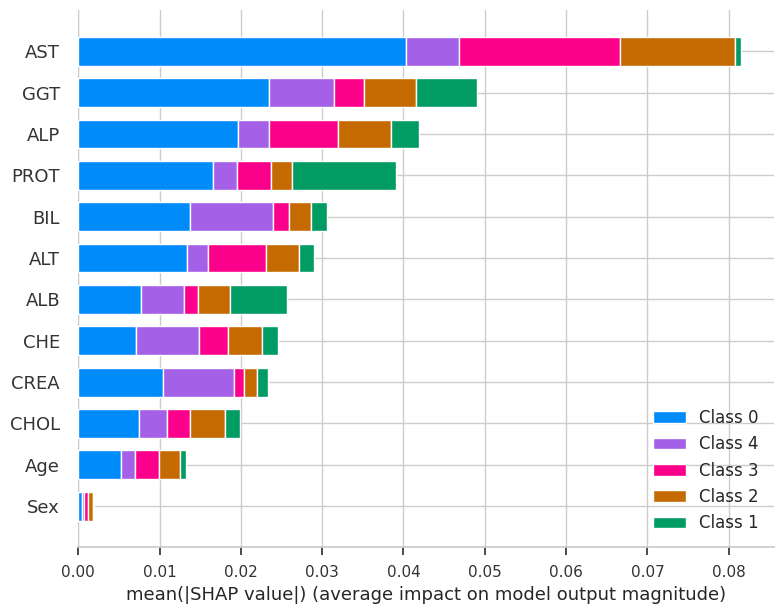

In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming X_train and y_train are already defined and preprocessed
svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train, y_train)

# Use KernelExplainer for non-tree models like SVC
explainer = shap.KernelExplainer(svc_model.predict_proba, shap.kmeans(X_train, 10))  # use kmeans sampling for background

# Compute SHAP values (for class 1 by default, or use slicing)
shap_values = explainer.shap_values(X_train[:100])  # Limit to first 100 rows for speed

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_train[:100], plot_type="bar")  # or plot_type="dot"


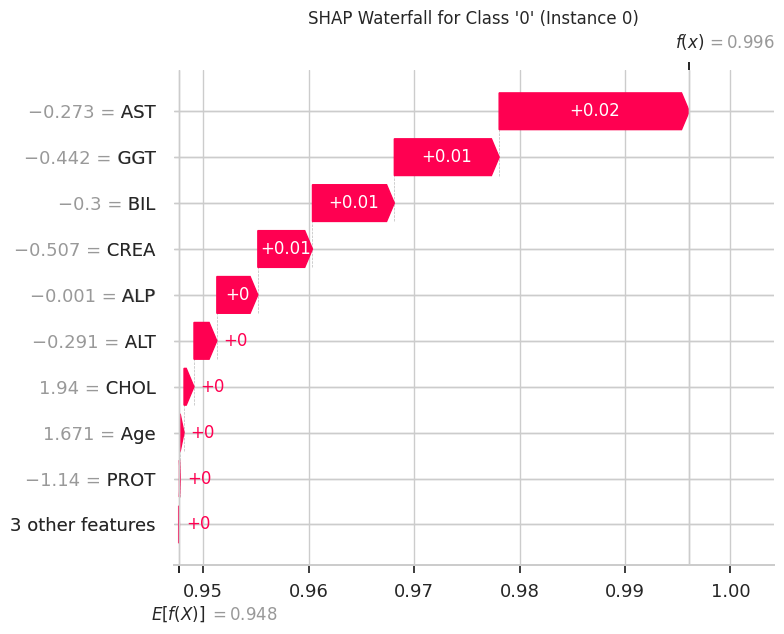

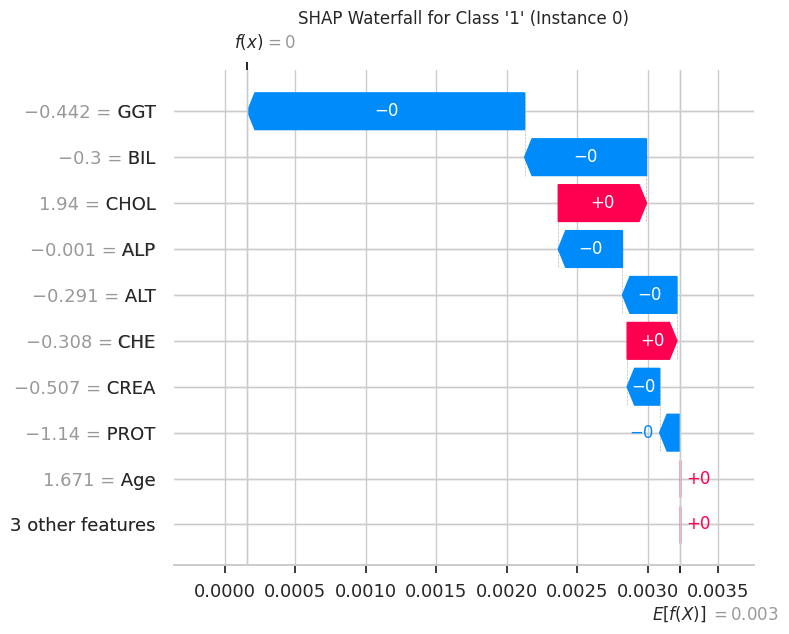

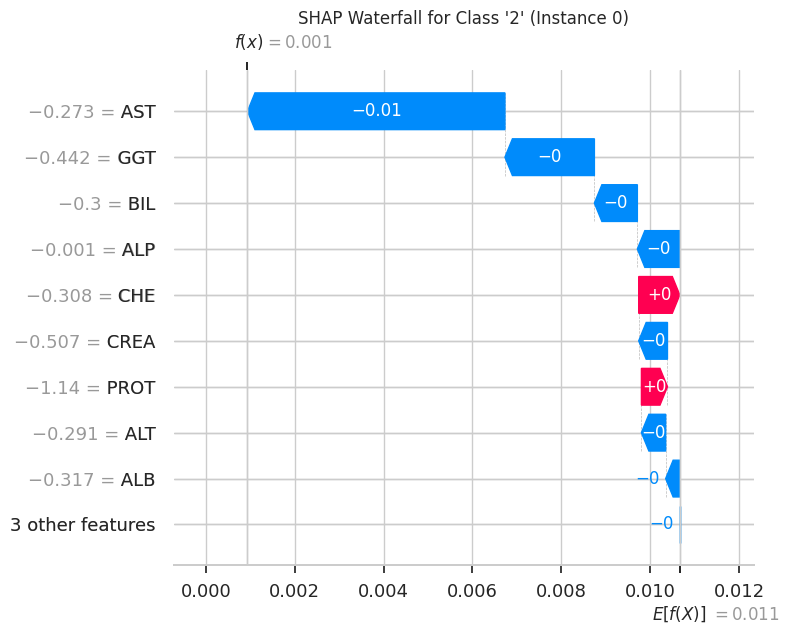

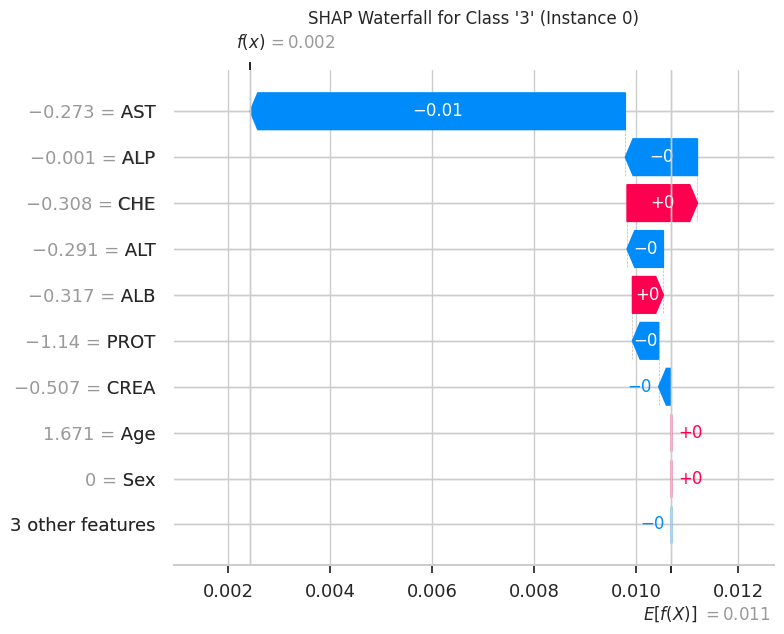

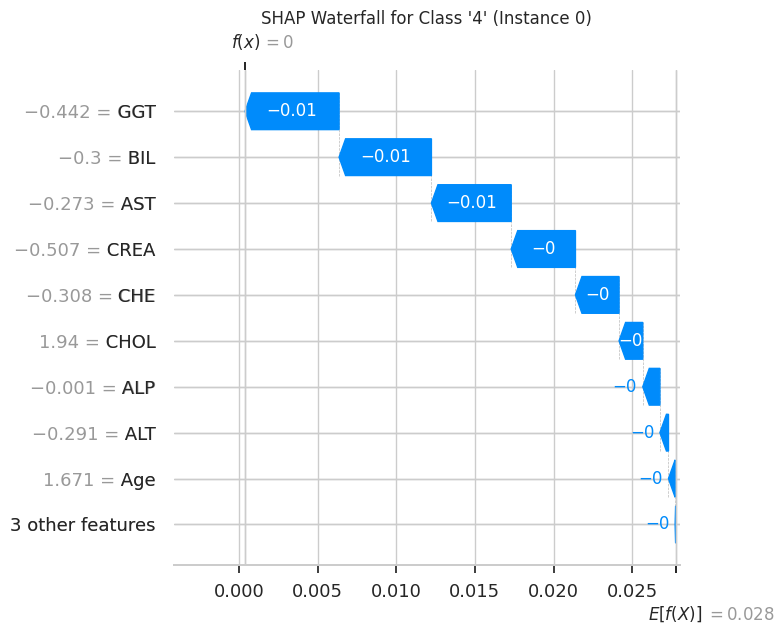

In [ ]:
import shap
import matplotlib.pyplot as plt

# Suppose you want to inspect the i-th test sample
instance_idx = 0

# Get the SHAP values array for that instance (shape: n_features × n_classes)
instance_shap_values = shap_values[instance_idx]

# Loop over each class index
for class_idx in range(instance_shap_values.shape[1]):
    # Grab the human‑readable class name
    class_name = model.classes_[class_idx] # This gets the actual class label

    # Build the SHAP Explanation object
    expl = shap.Explanation(
        values=instance_shap_values[:, class_idx],            # SHAP values for this class
        base_values=explainer.expected_value[class_idx],      # Baseline for this class
        data=X_test.iloc[instance_idx].values,                # Feature values for the instance
        feature_names=X_test.columns                          # Column names
    )

    # Plot the waterfall
    plt.figure(figsize=(6, 4))
    shap.plots.waterfall(expl, show=False)
    # Update the title to use class_name instead of class_idx
    plt.title(f"SHAP Waterfall for Class '{class_name}' (Instance {instance_idx})")
    plt.tight_layout()
    plt.show()